In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data/1.32.csv")

## normalization

In [3]:
df["userTime"] = df["userTime"].astype(pd.Timestamp)
df["serverTime"] = df["serverTime"].astype(np.datetime64)
df["gameVersion"] = df["gameVersion"].astype(str)


In [4]:
df.head()

,id,serverTime,userTime,gameVersion,playerId,playerBirthdate,playerRegion,playerCountry,playerGender,playerExternalId,...,type,coordinates,section,customData.language,customData.controls,customData.device,customData.sound,customData.gamelevel,customData,customData.dnabit
0,13815a6e-da1d-4b1d-862f-6e394a4cec98,2015-09-10 12:32:45.204,2015-09-10T12:32:48.469Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,2bb4a2ab-eaf1-4e0e-b2fe-5f5e88248733,NaN,NaN,NaN,NaN,NaN,...,start,"[-6, 143]",NaN,NaN,NaN,NaN,NaN,NaN,null,NaN
1,36963346-0445-45ce-bad0-b767325becb2,2015-09-10 12:32:45.212,2015-09-10T12:32:48.481Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,8565a7b9-811b-4b56-9cae-c7eeb28314d7,NaN,NaN,NaN,NaN,NaN,...,start,"[-6, 143]",NaN,NaN,NaN,NaN,NaN,NaN,null,NaN
2,7705c2aa-1de0-40c2-8cea-71e60b326f54,2015-09-10 12:33:35.665,2015-09-10T12:33:38.935Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,8565a7b9-811b-4b56-9cae-c7eeb28314d7,NaN,NaN,NaN,NaN,NaN,...,reach,"[-6, 134]",Checkpoint01,NaN,NaN,NaN,NaN,NaN,null,NaN
3,b327e325-bf7d-4ecc-9c7c-ab9b3894eedd,2015-09-10 13:41:43.245,2015-09-10T13:41:46.501Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,4d9c1137-d582-4333-b264-e59eebd2b6d8,NaN,NaN,NaN,NaN,NaN,...,start,"[-6, 143]",NaN,NaN,NaN,NaN,NaN,NaN,null,NaN
4,d00eb541-9be1-4483-b622-f72b30507adb,2015-09-10 13:41:53.529,2015-09-10T13:41:56.785Z,be209fe8-0ef3-4291-a5f4-c2b389f5d77d,4d9c1137-d582-4333-b264-e59eebd2b6d8,NaN,NaN,NaN,NaN,NaN,...,reach,"[-4, 134]",Checkpoint01,NaN,NaN,NaN,NaN,NaN,null,NaN


## Unique Game Sessions

Number of unique game sessions

In [5]:
playerscount = df["playerId"].nunique()
playerscount

184

## Generic Treatment

,crafts
count,183.000000
mean,0.382514
std,1.987909
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,18.000000


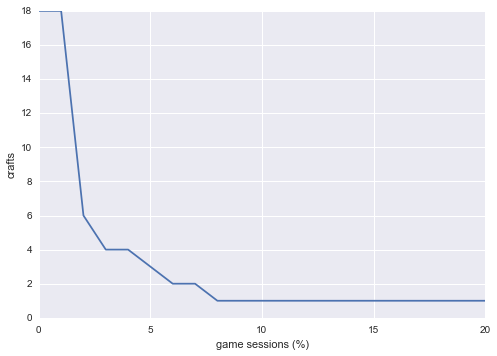

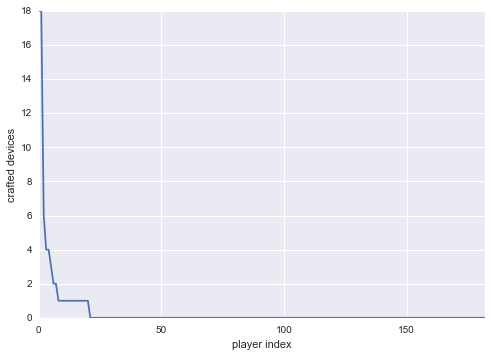

In [7]:
gameSessionCount = df["playerId"].nunique()
gameSessionCount


studiedEvent = "craft"
columnName = studiedEvent+"s"
graphLabel = columnName

studiedEventCount = df[df["type"]==studiedEvent]["id"].count()
studiedEventCount
mean = studiedEventCount / float(gameSessionCount)
mean

positiveGameSessions = df[df["type"]==studiedEvent]["playerId"].value_counts()

positiveGameSessionCount = positiveGameSessions.count()
positiveGameSessionCountTable = pd.DataFrame({columnName: positiveGameSessions.values})

positiveGameSessionCountTable.plot()
plt.xlabel("game sessions (%)")
plt.ylabel(graphLabel)
plt.legend('')

positiveGameSessionCountTable.describe()

negativeGameSessionCountSeries = pd.Series(0, index=(list(range(positiveGameSessionCount,gameSessionCount-1))))
negativeGameSessionCountTable = pd.DataFrame({columnName: negativeGameSessionCountSeries})
print 

fullEventGameSessionCountTable = pd.concat([positiveGameSessionCountTable, negativeGameSessionCountTable]) 
fullEventGameSessionCountTable.plot()
plt.xlabel("player index")
plt.ylabel("crafted devices")
plt.legend('')

fullEventGameSessionCountTable.describe()